## Load Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time as tm

## Load Data

In [22]:
# path = "C:/Users/galeaj-admin/AppData/LocalLow/DefaultCompany/QuestHandTrackingTest/ptx_07_joe/"
# path = "C:/Users/galeaj-admin/Downloads/QuestTrackingAccuracy-main/QuestTrackingAccuracy-main/ptx_07_joe/"
# fileName = "pilot_007_h1_Target_row_C2_Trial_16_.json"

# path = "C:/Users/ActionLab/AppData/LocalLow/DefaultCompany/QuestHandTrackingTest/" 
path = "C:/Users/ActionLab/Desktop/QuestTrackingData/Davide_1st_Sep_2021/"
fileName = "1630575682_dd_low_bpm_120_lf11q_Target_row_B2_Trial_22_.json"

df = pd.read_json(path + fileName)

In [23]:
df

,frameNum,gameObjectName,xPos,yPos,zPos,xRot,yRot,zRot,targetID,xTPos,yTPos,zTPos,time
0,0,realFingerTip,-0.824443,0.296406,0.116277,0.000000,0.000000,0.000000,row_B2,-1.025039,0.295493,0.323283,2.881454
1,0,b_r_index_null,-0.816545,0.292927,0.120360,349.149017,259.560800,324.372528,row_B2,-1.025039,0.295493,0.323283,2.881454
2,0,r_index_fingernail_marker,-0.816945,0.295603,0.127096,349.149017,259.560800,324.372528,row_B2,-1.025039,0.295493,0.323283,2.881454
3,0,r_index_finger_tip_marker,-0.818964,0.287522,0.129431,349.149017,259.560800,324.372528,row_B2,-1.025039,0.295493,0.323283,2.881454
4,0,r_index_finger_pad_marker,-0.817651,0.286275,0.119795,349.149017,259.560800,324.372528,row_B2,-1.025039,0.295493,0.323283,2.881454
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,86,b_r_index3,-1.016463,0.290670,0.314378,353.250916,252.980000,343.142800,row_B2,-1.025039,0.295493,0.323283,1.183365
1526,86,b_r_index2,-1.007673,0.300611,0.294016,353.885162,249.402725,335.709717,row_B2,-1.025039,0.295493,0.323283,1.183365
1527,86,b_r_index1,-0.993337,0.308152,0.259722,356.596741,248.004578,348.510300,row_B2,-1.025039,0.295493,0.323283,1.183365
1528,86,b_r_wrist,-0.934997,0.319503,0.180406,353.059100,248.436523,355.815643,row_B2,-1.025039,0.295493,0.323283,1.183365


## Plot data
#### This section plots the raw position data

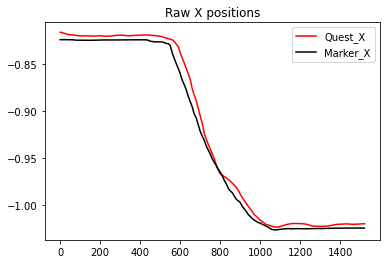

In [24]:
# xPos = df.xPos[df.gameObjectName[df.gameObjectName == 'b_r_index_null']]
# zPos = df.zPos[df.gameObjectName[df.gameObjectName == 'b_r_index_null']]

xPos = df.loc[df['gameObjectName'] == 'b_r_index_null', 'xPos']
zPos = df.loc[df['gameObjectName'] == 'b_r_index_null', 'zPos']
xPosM = df.loc[df['gameObjectName'] == 'realFingerTip', 'xPos']
zPosM = df.loc[df['gameObjectName'] == 'realFingerTip', 'zPos']
time = df.loc[df['gameObjectName'] == 'realFingerTip', 'time']

plt.plot(xPos,'r')
# plt.plot(zPos,'g')
# plt.plot(xPosM,zPosM,'k')
plt.plot(xPosM,'k')
# plt.plot(df.time*0.1,'b')
# plt.plot(df.frameNum*0.01,'k')
#plt.legend(['Hand','Target'])
plt.title('Raw X positions')
plt.legend(["Quest_X","Marker_X"])

In [25]:
# t = np.diff(time)
# # plt.plot(t[40:],'b')
# plt.plot(time,'b')

Original number of values (153,)
Unique quest (153,)
Unique marker (153,)
Time length:  (153,)


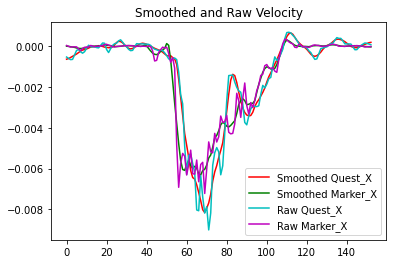

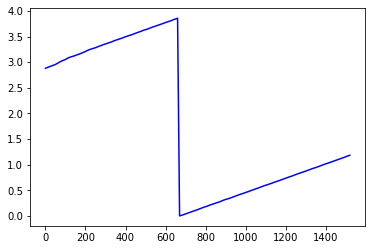

In [26]:
from scipy.signal import savgol_filter

print("Original number of values", np.shape(xPos))
print("Unique quest", np.shape(np.unique(xPos)))
print("Unique marker", np.shape(np.unique(xPosM)))

sxPos = savgol_filter(xPos, 11, 2)
sxPosM = savgol_filter(xPosM, 11, 2)
                       
plt.plot(np.gradient(sxPos),'r')
plt.plot(np.gradient(sxPosM),'g')
plt.plot(np.gradient(xPos),'c')
plt.plot(np.gradient(xPosM),'m')

plt.title("Smoothed and Raw Velocity")
plt.legend(["Smoothed Quest_X","Smoothed Marker_X","Raw Quest_X","Raw Marker_X"])

plt.figure()
t = np.diff(time)
# plt.plot(t[40:],'b')
plt.plot(time,'b')
print('Time length: ', np.shape(time))

In [101]:
import math
import sys

import numpy as np
import numpy.linalg
import pylab as py

def sg_filter(x, m, k=0):
    """
    x = Vector of sample times
    m = Order of the smoothing polynomial
    k = Which derivative
    """
    mid = len(x) / 2        
    a = x - x[mid]
    expa = lambda x: map(lambda i: i**x, a)    
    A = np.r_[map(expa, range(0,m+1))].transpose()
    Ai = np.linalg.pinv(A)

    return Ai[k]

def smooth(x, y, size=5, order=2, deriv=0):
    
#     if deriv > order:
#         raise Exception, "deriv must be <= order"

    n = len(x)
    m = size

    result = np.zeros(n)

    for i in xrange(m, n-m):
        start, end = i - m, i + m + 1
        f = sg_filter(x[start:end], order, deriv)
        result[i] = np.dot(f, y[start:end])

    if deriv > 1:
        result *= math.factorial(deriv)

    return result